In [12]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

### Testing accuracy with 4 neignbors.

In [13]:
music.describe()

,duration,loudness,bpm
count,30.000000,30.000000,30.000000
mean,222.966667,21.900000,89.333333
std,92.743057,11.645185,15.563736
min,102.000000,4.000000,60.000000
25%,168.500000,13.250000,75.750000
50%,197.500000,19.500000,90.000000
75%,261.250000,27.750000,101.500000
max,403.000000,51.000000,120.000000


In [14]:
# why do I have 500 rows??

T.shape

(500, 1)

In [ ]:
from sklearn import neighbors

# Build model

# model fails with loudness & duration, but will pass with either parameter

knn = neighbors.KNeighborsRegressor(n_neighbors=4)
X = music[['loudness', 'duration']]
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T1 = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_1, c='g', label='prediction')
plt.xticks(rotation=90)
plt.legend()
plt.title('K=4, Unweighted')
plt.show()

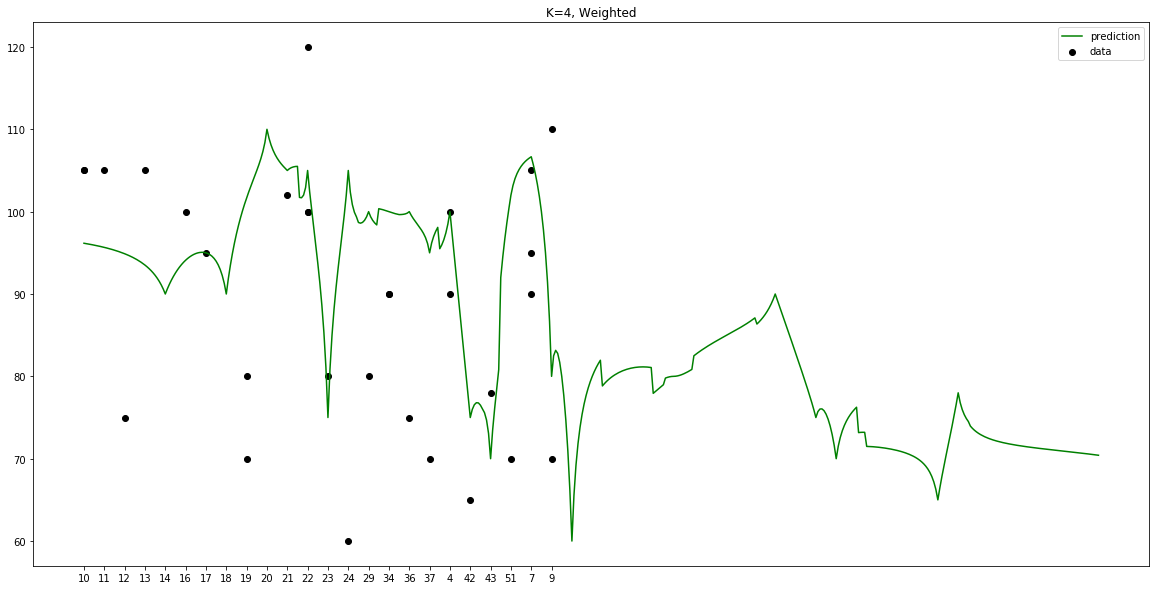

In [10]:
# running the same model with weights

# model fails with loudness & duration, but will pass with either parameter

knn_w = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
X = music[['loudness', 'duration']]
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=4, Weighted')
plt.show()

In [11]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.04 (+/- 0.87)
Weighted Accuracy: 0.16 (+/- 0.86)


### Testing accuracy with 8 neighbors.

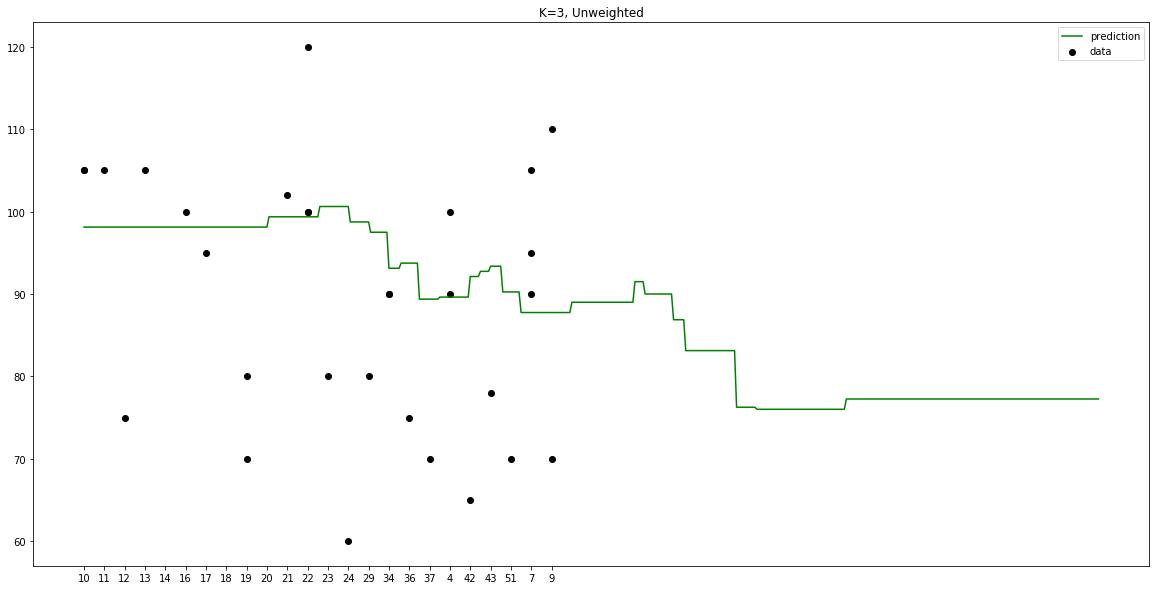

In [12]:
# Build model

# model fails with loudness & duration, but will pass with either parameter

knn = neighbors.KNeighborsRegressor(n_neighbors=8)
X = music[['loudness', 'duration']]
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=8, Unweighted')
plt.show()

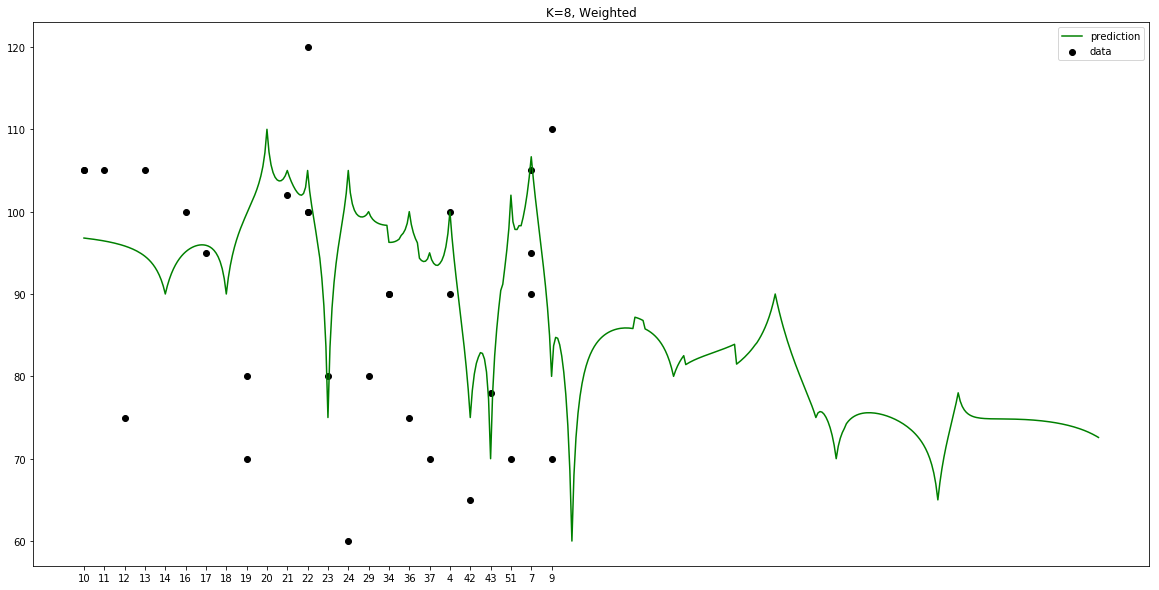

In [7]:
# weighted model

# model fails with loudness & duration, but will pass with either parameter

knn_w = neighbors.KNeighborsRegressor(n_neighbors=8, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
#T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=8, Weighted')
plt.show()

In [14]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.25 (+/- 0.90)
Weighted Accuracy: 0.10 (+/- 0.98)


**The lower the number of neighbors, the higher the prediction accuracy.**

### Testing accuracy based on duration instead of loudness.  

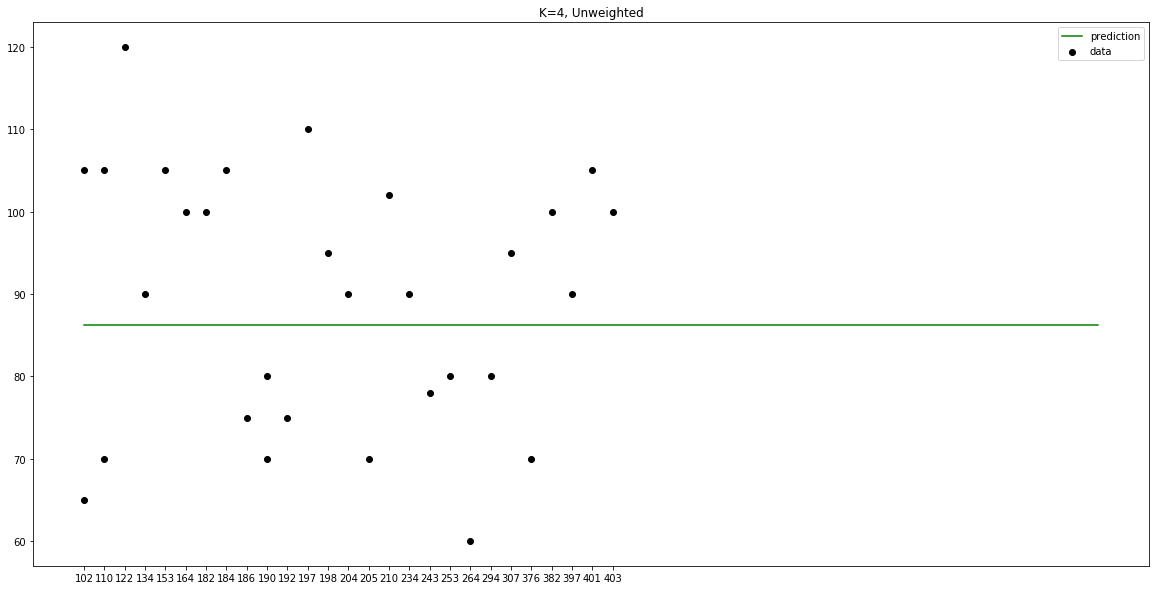

In [15]:
# Build model

knn = neighbors.KNeighborsRegressor(n_neighbors=4)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=4, Unweighted')
plt.show()

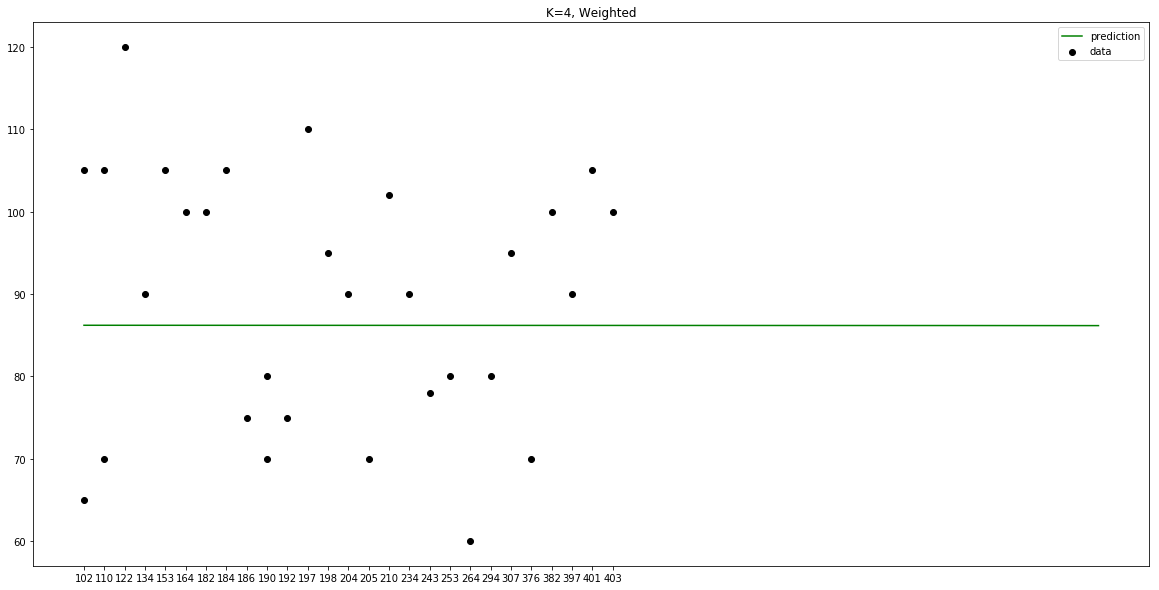

In [16]:
# weighted model

knn_w = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=4, Weighted')
plt.show()

In [14]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.76 (+/- 0.70)
Weighted Accuracy: -0.94 (+/- 0.86)


**Running the knn model based solely on duration as opposed to loudness yielded even worse predictions than loudness alone.**